# Create data

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'
plt.rcParams['figure.figsize'] = 20, 12  # default hor./vert. size of plots, in inches

In [3]:
import os
from PIL import Image
import glob

In [4]:
borders = gpd.read_file('../data/municipality-geo.gpkg')
municipalities = pd.read_excel('../data/Gemeenten alfabetisch 2020.xlsx')
municipalities = municipalities[municipalities['Provincienaam']=='Noord-Brabant']
m_list = municipalities['Gemeentecode'].to_list()
borders = borders[borders['code'].astype(int).isin(m_list)]
borders.reset_index(inplace=True)

# Add the infected column

In [5]:
# Load the matrix output from the OD script
infected = np.load('../data/I_62_101.npy')
df = borders.copy()
# Add columns for each day
for i in range(0,101):
    df.loc[:,str(i)+'_infected'] = infected[:,i]
column_list = list(df.columns[6:])

# Gif

In [6]:
# save all the maps in the charts folder
output_path = '../data/maps_62_munies'
# counter for the for loop
i = 0
# set the min and max range for the choropleth map
vmin, vmax = 0, 0.70

In [7]:
# start the for loop to create one map per column
day_nr = 0
for infected in column_list:
    # added plt.Normalize to keep the legend range the same for all maps
    fig = df.plot(column=infected, cmap='YlOrRd', figsize=(20,12), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
                 legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    fig.axis('off')
    fig.set_title('Infected cases per municipality', fontdict =  {'fontsize' : '25', 'fontweight' : '3'})
    if day_nr < 0:
        day_anno = '00'+str(day_nr)
    fig.annotate('day '+str(day_nr), xy=(0.1, .225), xycoords='figure fraction',
        horizontalalignment='left', verticalalignment='top', fontsize=35)
    filepath = os.path.join(output_path, str(day_nr)+'.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=72)
    day_nr += 1
    plt.close()

In [8]:
# Create the frames
frames = []
imgs = sorted(glob.glob("../data/maps_62_munies/*.png"), key=os.path.getmtime) # key getmtime tell it to sort on creation time
for i in imgs[40:]:
    new_frame = Image.open(i)
    frames.append(new_frame)
# Save into a GIF file
frames[0].save('../data/maps_62_munies/gif.gif', format='GIF', append_images=frames[1:], save_all=True, duration=500, loop=0)

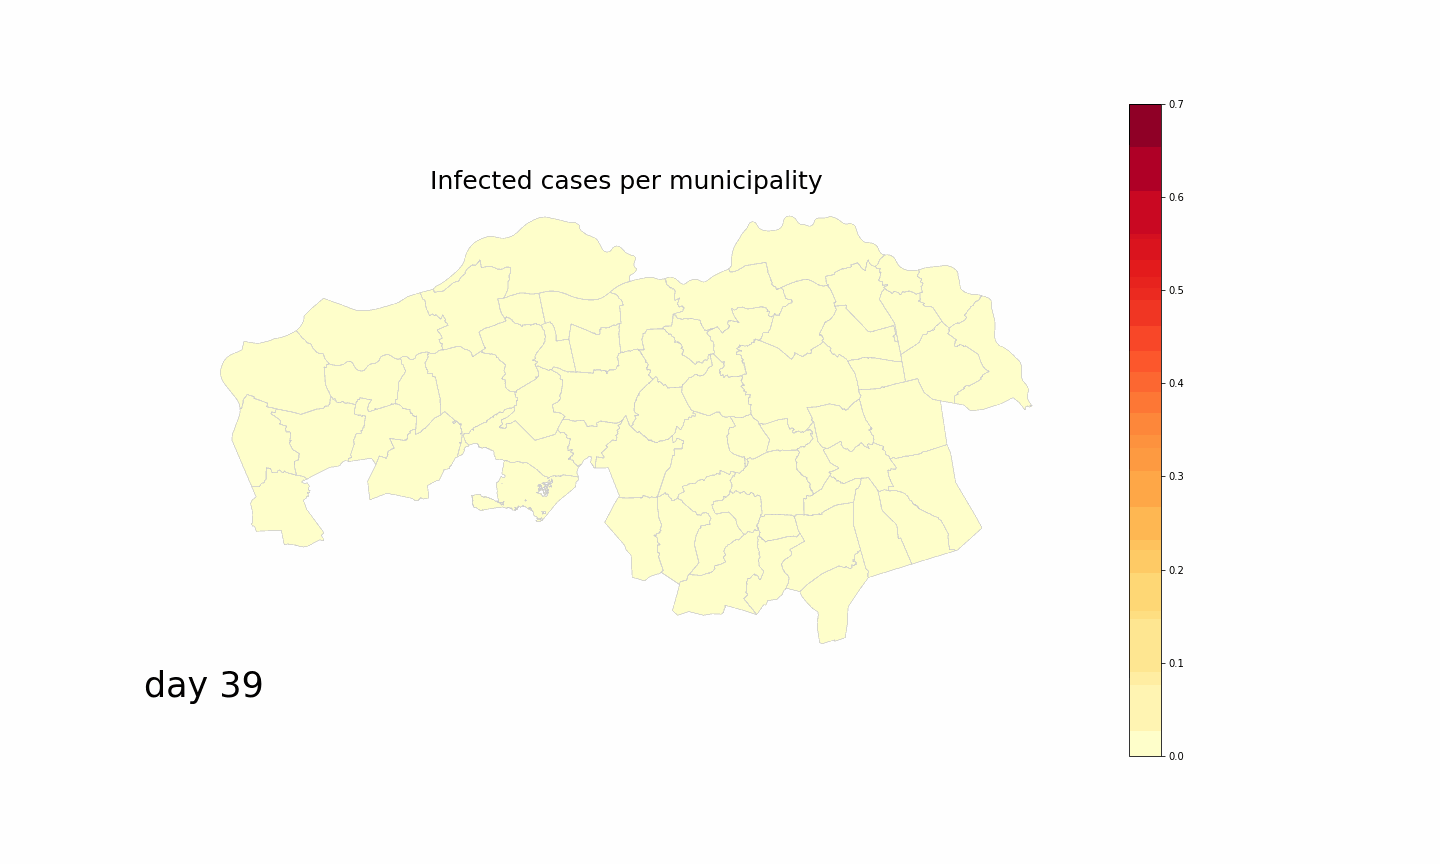

In [9]:
# Show the Gif in Notebook
from IPython.display import Image as I
I("../data/maps_62_munies/gif.gif")